# Insigths iniciais

Podemos trabalhar com porcentagem de corte de completude dos dados em 70% e taxa de dados incertos em 20% (Temos 37 paises nessas condições- variável: country_good_data_quality)

Com esses datasets iniciais podemos listar as seguintes situações:

    1. Países/Estados com maior Rate de suicídio
    2. Países onde o Rate de suicídio feminino é maior do que o masculino
    3. Países com maiores Rates de suicídio feminino
    4. Faixa etária com maior desvio padrão ref. ao Rate de suícidio (Considerando os anos de 2000 a 2017 - Nesta época os dados coletados são mais confiáveis)
    5. Países com maior Rate de suício entre os jovens
    6. Crescimento do suícidio por faixa etária (Em qual faixa etária existe o maior crescimento nos últimos anos)
    7. Criar um histograma com a média do Rate por idade
    8. Países com maior número de mortes por arma de fogo (homens e mulheres)
    9. Criar um gráfico de dispersão ref. a dados de clima anuais
    10. [...]
    
Na parte de ML entendo que podemos utilizar os 3C´s:

- Algoritimo de Regressão (Previsão)
- Algoritmo de Árvore de decisão (Classificação - Indução de regras - Supervisionada)
- Análise de clusters. (Grupo de dados semelhantes - Não supervisionado)

E também:

- Text Minning (Análise de sentimento);

In [1]:
#Libs utilizadas
import pandas as pd
import re
from unicodedata import normalize
#!pip install seaborn
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# para visualização
from plotnine import *
import matplotlib.pyplot as plt

# para que os gráficos sejam
# mostrados
%matplotlib inline

In [3]:
def trata_texto(texto):
    tratado = normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    return re.search('[^0-9]+', tratado).group(0).strip().upper()

In [92]:
#################
## DATA IMPORT ##
#################

#Qualidade dos dados WHO
who_data_quality = pd.read_excel('data/Country_Data_Quality_WHO.xlsx', 
                  encoding='utf-8', 
                  na_values='-',
                  names=['Country','Year','Average_Usuability','Completeness','Completeness_end',
                         'Garbage_frac','Garbage_frac_end','Notes'])

who_data_quality = who_data_quality.sort_values(by='Country')
#Detalhes da base de dados na segunda aba do arquivo

ihge_data = pd.read_csv('data/IHME-GBD_2017_DATA-a27917f2/IHME-GBD_2017_DATA-a27917f2.csv', 
                  skiprows=1, 
                  sep=',', 
                  encoding='utf-8', 
                  na_values='-', 
                  engine='python',
                  names=['Metric','Country','Sex','Age','Cause of Death','Rate','Year',
                         'Total','Upper','Lower'])

who_data = pd.read_csv('data/WHO_SDGSUICIDE.csv', 
                  skiprows=2, 
                  #skipfooter=8, 
                  sep=',', 
                  encoding='utf-8', 
                  na_values='-', 
                  engine='python',
                  names=['Country','Year','DC','Male_DC','Female_DC',
                         'SU','Male_SU','Female_SU'])

location_details = pd.read_excel('data/IHME_GBD_2017_ALL_LOCATIONS_HIERARCHIES_Y2018M11D18.XLSX',
                  encoding='utf-8',
                  na_values='-')

#Ultima versão que contém o level em 1 - 5 
# 0 Valor global
# 1 Hemisfério
# 2 Regiões geograficas
# 3 Paises
# 4 Estados
# 5 Subregiões dos paises (Limitado a London, England e Midlands)
location_details = location_details[(location_details['location_set_version_id'] == 423)]

ihge_data = pd.merge(ihge_data,location_details,left_on='Country', right_on='location_name')

#Campo mais descritivo como categoria
ihge_data['cat_level'] = ihge_data.level.apply(lambda x: ["Global","Hemisphere", "Geo Region","Country"
                                                          ,"City","Downton"][x]).astype("category")

drop_elements = ['Metric','Rate','location_set_version_id','location_name','sort_order']
ihge_data = ihge_data.drop(drop_elements, axis = 1)

#ihge_data.head()

ihge_data.Country = ihge_data.Country.apply(trata_texto)
who_data_quality.Country = who_data_quality.Country.apply(trata_texto)

ihge_data.to_csv('data/IHME-GBD_2017_DATA.csv',sep=',',encoding='utf-8',index=False)

In [ ]:
cities_data = pd.read_csv('data/simplemaps_worldcities_basicv1.5/worldcities.csv', 
                  skiprows=1, 
                  sep=',', 
                  encoding='utf-8', 
                  na_values='-', 
                  engine='python',
                  names=['City_','City','latitude','longitude','Country','Country_id_','Country_id',
                         'highest_level','capital','population','id'])

drop_elements = ['highest_level','id','City_','Country_id_','capital']
cities_data = cities_data.drop(drop_elements, axis = 1)

cities_data.Country = cities_data.Country.apply(trata_texto)
cities_data.City = cities_data.City.apply(trata_texto)

#ihge_data_city = pd.merge(ihge_data,cities_data,left_on='Country', right_on='City', how='left')
ihge_data_city = pd.merge(ihge_data,cities_data,left_on='Country', right_on='Country', how='left')
ihge_data_city
#ihge_data_city.to_csv('data/IHME-GBD_2017_DATA_CITIES.csv',sep=',',encoding='utf-8',index=False)

In [5]:
#Paises com dados considerados completos superior a 70% 
#e com taxa de dados incompletos ou incorretos menor que 25%
countries_data_quality = who_data_quality[(who_data_quality['Completeness'] > 0.70) 
                                                 & (who_data_quality['Garbage_frac_end'] <= 25)
                                            ].Country.unique()

print("Total de Paises com dados confiaveis:", countries_data_quality.size)

('Total de Paises com dados confiaveis:', 91)


In [6]:
print("###### Média #####")

print(ihge_data[(ihge_data['Age'] == 'All Ages') & (ihge_data['Cause of Death'] == 'Self-harm') & (ihge_data['Sex'] == 'Both')]
      [['cat_level','Total']].groupby(['cat_level'], as_index=False).mean())
print("\n###### Mediana #####")
print(ihge_data[(ihge_data['Age'] == 'All Ages')& (ihge_data['Cause of Death'] == 'Self-harm') & (ihge_data['Sex'] == 'Both')]
      [['cat_level','Total']].groupby(['cat_level'], as_index=False).median())

###### Média #####
    cat_level      Total
0        City  12.357320
1     Country  11.182149
2     Downton   8.856458
3  Geo Region  12.555462
4      Global  12.551623
5  Hemisphere  12.142076

###### Mediana #####
    cat_level      Total
0        City  10.638595
1     Country   8.095433
2     Downton   8.917074
3  Geo Region  12.086785
4      Global  12.301580
5  Hemisphere  12.012969


C:\ProgramData\Anaconda2\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\ProgramData\Anaconda2\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


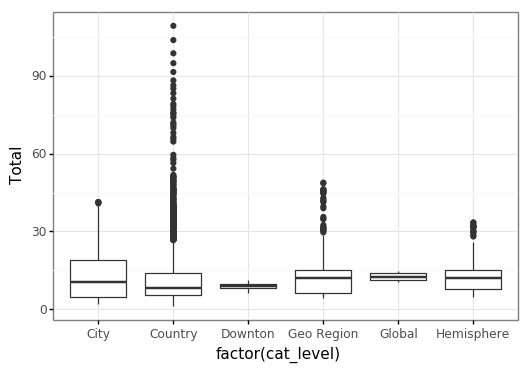

<ggplot: (164751666)>

In [7]:
p = ggplot(ihge_data[(ihge_data['Age'] == 'All Ages') 
                 & (ihge_data['Cause of Death'] == 'Self-harm') 
                 & (ihge_data['Sex'] == 'Both')
                 #& (ihge_data['level'] == 0)
                ],
       aes(x = "factor(cat_level)", y = "Total")) + \
geom_boxplot() + theme_bw()
p

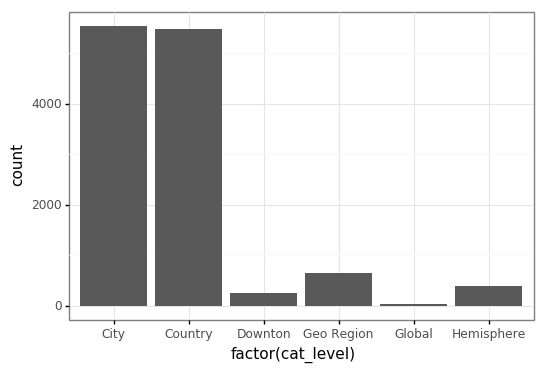

<ggplot: (15386197)>

In [8]:
p_m = ggplot(aes(x = "factor(cat_level)"), ihge_data[(ihge_data['Age'] == '20 to 24') 
                 & (ihge_data['Cause of Death'] == 'Self-harm') 
                 & (ihge_data['Sex'] == 'Both')
                ]) + \
geom_bar() + theme_bw()
p_m

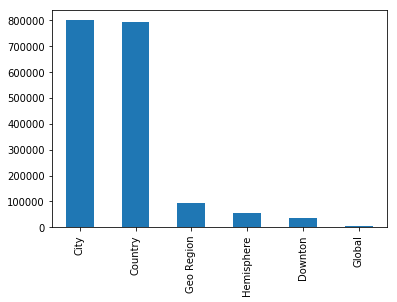

In [9]:
ihge_data['cat_level'].value_counts().plot.bar()

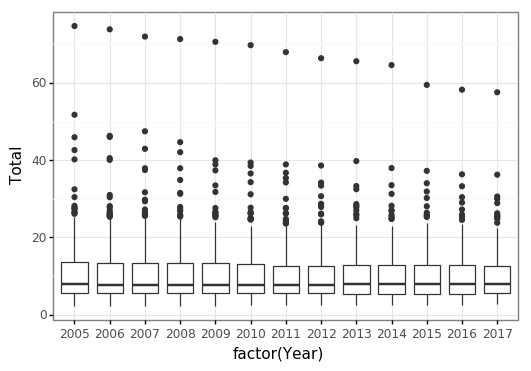

<ggplot: (72610539)>

In [10]:
p = ggplot(ihge_data[(ihge_data['Age'] == 'All Ages') 
                 & (ihge_data['Cause of Death'] == 'Self-harm') 
                 & (ihge_data['Sex'] == 'Both')
                 & (ihge_data['Year'] >= 2005)
                 & (ihge_data['cat_level'] == 'Country')
                ],
       aes(x = "factor(Year)", y = "Total")) + \
geom_boxplot() + theme_bw() 
p

In [11]:
#Métricas globais
metricas_globais = ihge_data[
          (ihge_data['Country'] == 'GLOBAL') 
          &(ihge_data['Sex'] == 'Both')
          # & (ihge_data['Year'] >= 2017)
          & (ihge_data['Age'] == 'All Ages')
          & (ihge_data['Cause of Death'] == 'Self-harm')
          ].sort_values(by="Total", ascending=False)

metricas_globais.describe(include="all")

,Country,Sex,Age,Cause of Death,Year,Total,Upper,Lower,location_id,parent_id,level,cat_level
count,28,28,28,28,28.000000,28.000000,28.000000,28.000000,28.0,28.0,28.0,28
unique,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,GLOBAL,Both,All Ages,Self-harm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Global
freq,28,28,28,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
mean,NaN,NaN,NaN,NaN,2003.500000,12.551623,12.926905,11.605263,1.0,1.0,0.0,NaN
std,NaN,NaN,NaN,NaN,8.225975,1.559537,1.689022,1.309244,0.0,0.0,0.0,NaN
min,NaN,NaN,NaN,NaN,1990.000000,10.389726,10.727996,9.731667,1.0,1.0,0.0,NaN
25%,NaN,NaN,NaN,NaN,1996.750000,11.277410,11.509459,10.548202,1.0,1.0,0.0,NaN
50%,NaN,NaN,NaN,NaN,2003.500000,12.301580,12.587125,11.504791,1.0,1.0,0.0,NaN
75%,NaN,NaN,NaN,NaN,2010.250000,14.081506,14.646193,12.754449,1.0,1.0,0.0,NaN


In [12]:
mean_global_suicide = metricas_globais['Total'].mean()
print('Media global de rate de suicidio: ',mean_global_suicide)

('Media global de rate de suicidio: ', 12.551622825178459)


## 1. Países/Estados com maior Rate de suicídio

In [13]:
## 1. Países/Estados com maior Rate de suicídio
paises_com_maior_rate = ihge_data[
          (ihge_data['Country'].isin(countries_data_quality)) 
          & (ihge_data['Sex'] == 'Both')
          & (ihge_data['Year'] >= 2017)
          & (ihge_data['Age'] == 'All Ages')
          & (ihge_data['Cause of Death'] == 'Self-harm')
                                                  ].sort_values(by="Total", ascending=False)

paises_com_maior_rate.head(10)

,Country,Sex,Age,Cause of Death,Year,Total,Upper,Lower,location_id,parent_id,level,cat_level
278111,LITHUANIA,Both,All Ages,Self-harm,2017,36.265684,39.102158,33.581359,60,56,3,Country
826463,RUSSIAN FEDERATION,Both,All Ages,Self-harm,2017,30.027721,30.872981,28.977562,62,56,3,Country
564239,GUYANA,Both,All Ages,Self-harm,2017,25.520233,29.067222,22.010321,113,104,3,Country
32159,BELARUS,Both,All Ages,Self-harm,2017,24.833589,27.678957,22.293826,57,56,3,Country
382943,KAZAKHSTAN,Both,All Ages,Self-harm,2017,23.808193,26.152183,21.877539,36,32,3,Country
245855,LATVIA,Both,All Ages,Self-harm,2017,22.513890,25.580098,19.715741,59,56,3,Country
16031,JAPAN,Both,All Ages,Self-harm,2017,22.450767,23.638844,21.492891,67,65,3,Country
100703,SRI LANKA,Both,All Ages,Self-harm,2017,20.945530,27.626381,16.683791,17,9,3,Country
1544159,HUNGARY,Both,All Ages,Self-harm,2017,20.822610,22.283580,19.523446,48,42,3,Country
1564319,SLOVENIA,Both,All Ages,Self-harm,2017,20.793951,22.587058,18.912356,55,42,3,Country


### Cruzar dados com identificação de estado

In [14]:
## Fonte: https://github.com/datasets/world-cities
world_cities = pd.read_csv('data/world-cities.csv', 
                  skiprows=0, 
                  #skipfooter=8, 
                  sep=',', 
                  encoding='utf-8', 
                  na_values='-', 
                  engine='python',
                  names=['City','Country','State','Geonameid'])

#Precisamos cruzar os datasets para incluir indicação de Pais e Estado
#Seria bacana obter um dataSet com Latitude e Longitude

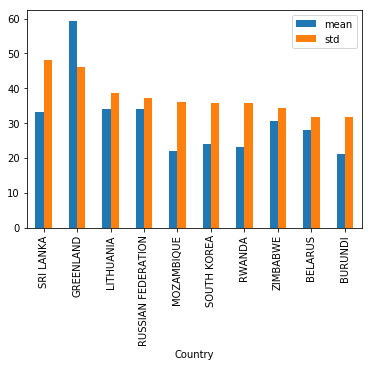

In [15]:
# Média e STD de cada Pais
ihge_data[(ihge_data['level'] == 3)].groupby("Country").agg(['mean', 'std']).Total.sort_values(by='std',ascending=False).head(10).plot.bar()
#.head(10)

## 2. Países onde o Rate de suicídio feminino é maior do que o masculino

In [32]:
paises_taxa_feminino_maior_masc = who_data_quality[(
                                who_data_quality.Country.isin(
                                    who_data[(who_data['Female_SU'] > who_data['Male_SU']) 
                                    & (who_data['Year'] > 2000)].Country)) 
                                & (who_data_quality['Completeness'] > 0.70)]

paises_taxa_feminino_maior_masc

paises_taxa_feminino_maior_masc = who_data[(who_data['Female_SU'] > who_data['Male_SU'])].Country.unique()

## 3. Países com maiores Rates de suicídio feminino

In [17]:
paises_com_alto_SU_feminino = ihge_data[(ihge_data['Sex'] == 'Female') 
                                        & (ihge_data['Total'] > mean_global_suicide)
                                        & (ihge_data['Age'] == 'All Ages') 
                                        & (ihge_data['Cause of Death'] == 'Self-harm')
                                        #& (ihge_data['Year'] >= 2017)
                                        & (ihge_data['Country'].isin(countries_data_quality))
                                       ]

paises_com_alto_SU_feminino.Country.unique()

array([u'JAPAN', u'BELARUS', u'ESTONIA', u'CUBA', u'SRI LANKA',
       u'SWITZERLAND', u'LATVIA', u'LITHUANIA', u'KAZAKHSTAN',
       u'SOUTH AFRICA', u'SWEDEN', u'BULGARIA', u'SERBIA',
       u'RUSSIAN FEDERATION', u'CROATIA', u'FINLAND', u'AUSTRIA',
       u'DENMARK', u'FRANCE', u'BELGIUM', u'HUNGARY', u'SLOVENIA'],
      dtype=object)

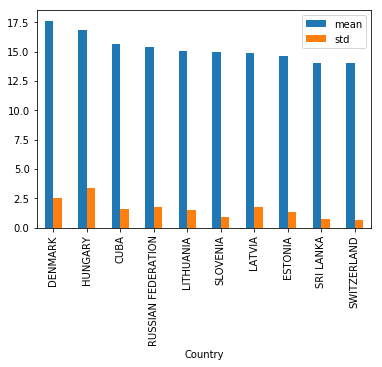

In [18]:
paises_com_alto_SU_feminino.groupby("Country").agg(['mean', 'std']).Total.sort_values(by='mean',ascending=False).head(10).plot.bar()

## 4. Faixa etária com maior desvio padrão ref. ao Rate de suícidio

###### Média #####
AxesSubplot(0.125,0.125;0.775x0.755)


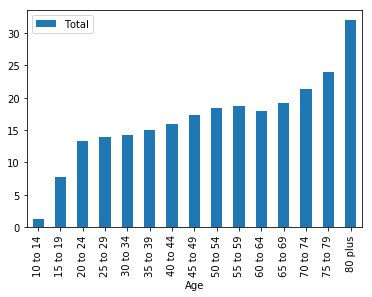

In [19]:
print("###### Média #####")
print(ihge_data[(ihge_data['Age'] != 'All Ages') & (ihge_data['Cause of Death'] == 'Self-harm') & (ihge_data['Sex'] == 'Both')]
      [['Age','Total']].groupby(['Age'], as_index=True).mean()).plot.bar()


###### Mediana #####
AxesSubplot(0.125,0.125;0.775x0.755)


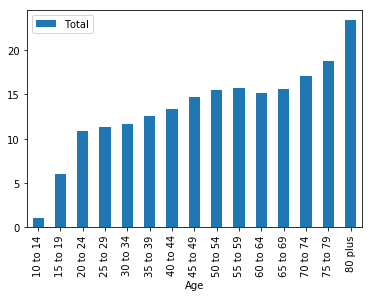

In [20]:
print("\n###### Mediana #####")
print(ihge_data[(ihge_data['Age'] != 'All Ages')& (ihge_data['Cause of Death'] == 'Self-harm') & (ihge_data['Sex'] == 'Both')]
      [['Age','Total']].groupby(['Age'], as_index=True).median()).plot.bar()

## 5. Países com maior Rate de suício entre os jovens

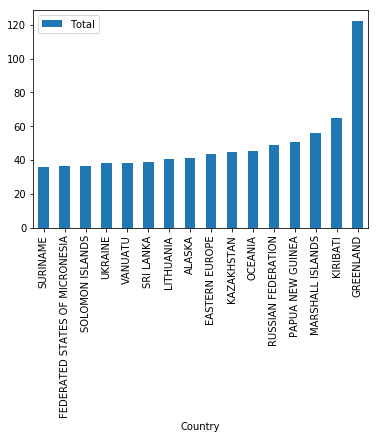

In [21]:
rates_alto_entre_jovens = ihge_data[(ihge_data['Total'] > 36) 
          & (ihge_data['Year'] > 2000) 
          & (ihge_data['Sex'] == 'Both') 
          & (ihge_data['Age'] == '20 to 24')
          & (ihge_data['Cause of Death'] == 'Self-harm')]

rates_alto_entre_jovens[['Country','Total']].groupby(['Country'], as_index=True).median().sort_values(by="Total").plot.bar()

## 6. Crescimento do suícidio por faixa etária 

## 7. Criar um histograma com a média do Rate por idade

## 8. Países com maior número de mortes por arma de fogo (homens e mulheres)

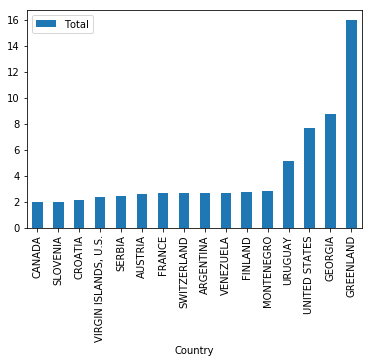

In [22]:
paises_maior_rate_arma_fogo = ihge_data[ 
           (ihge_data['Sex'] == 'Both') 
          & (ihge_data['Age'] == 'All Ages')
          & (ihge_data['Year'] > 2016)
          & (ihge_data['Cause of Death'] == 'Self-harm by firearm')
          & (ihge_data['level'] == 3)
          #& (ihge_data['Country'].isin(countries_data_quality))
          & (ihge_data['Total'] > 2)
          ]

paises_maior_rate_arma_fogo[['Country','Total']].groupby(['Country'], as_index=True).median().sort_values(by="Total").plot.bar()
#.sort_values(by=['Total'],ascending=False).head(10)

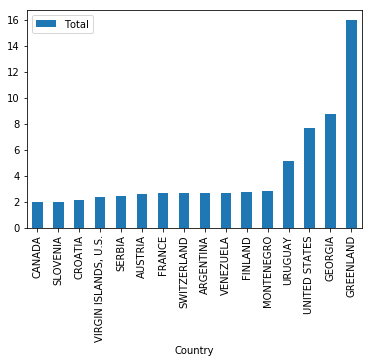

In [23]:
paises_maior_rate_arma_fogo[['Country','Total']].groupby(['Country'], as_index=True).median().sort_values(by="Total").plot.bar()

## 9. Criar um gráfico de dispersão ref. a dados de clima anuais

1. Listar paises/estados que gostaria de avaliar, pois os dados ref. a clima não estão estruturados de forma global.

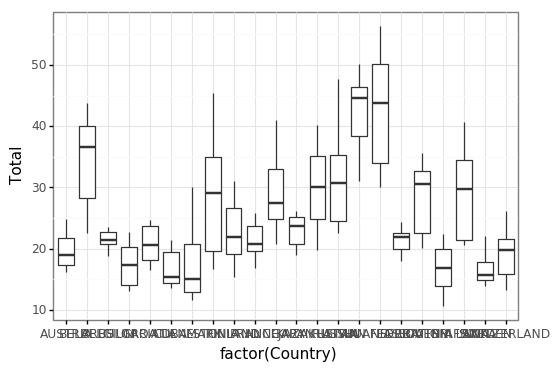

<ggplot: (155387277)>

In [67]:
p = ggplot(ihge_data[(ihge_data['Age'] == 'All Ages') 
                 & (ihge_data['Cause of Death'] == 'Self-harm') 
                 & (ihge_data['Sex'] == 'Both')
                 & (ihge_data['Country'].isin(paises_com_alto_SU_feminino.Country.unique()))
                ],
       aes(x = "factor(Country)", y = "Total")) + \
geom_boxplot() + theme_bw()
p

In [66]:
ihge_data[(ihge_data['Age'] == 'All Ages') 
                 & (ihge_data['Cause of Death'] == 'Self-harm') 
                 & (ihge_data['Sex'] == 'Both')
                 & (ihge_data['Country'].isin(paises_com_alto_SU_feminino.Country.unique()))
                ]

,Country,Sex,Age,Cause of Death,Year,Total,Upper,Lower,location_id,parent_id,level,cat_level
12143,JAPAN,Both,All Ages,Self-harm,1991,19.004522,19.202381,18.799545,67,65,3,Country
12287,JAPAN,Both,All Ages,Self-harm,1990,19.077155,19.266820,18.869652,67,65,3,Country
12431,JAPAN,Both,All Ages,Self-harm,1992,19.183474,19.376695,18.959625,67,65,3,Country
12575,JAPAN,Both,All Ages,Self-harm,1993,19.260050,19.451218,19.032512,67,65,3,Country
12719,JAPAN,Both,All Ages,Self-harm,1996,20.155164,20.338364,19.966590,67,65,3,Country
12863,JAPAN,Both,All Ages,Self-harm,1995,19.923747,20.122593,19.685562,67,65,3,Country
13007,JAPAN,Both,All Ages,Self-harm,1994,19.205937,19.401510,19.007261,67,65,3,Country
13151,JAPAN,Both,All Ages,Self-harm,1997,20.995449,21.208376,20.796125,67,65,3,Country
13295,JAPAN,Both,All Ages,Self-harm,1999,24.553174,24.797381,24.311331,67,65,3,Country
13439,JAPAN,Both,All Ages,Self-harm,1998,23.391933,23.603748,23.179402,67,65,3,Country
